# CS 681 Assignment 2 Muhammad Adnan Rizqullah 2403851

## Dataset download
In this step goal is to make the dataset ready to be used in the Jupyter notebook runtime. the dataset gets downloaded into the runtime of the Jupyter notebook for further processing.

In [2]:
from sklearn.datasets import fetch_20newsgroups

cats = ['rec.autos', 'comp.graphics']
newsgroups_train = fetch_20newsgroups(subset='train', categories=cats)

## Dateset exploration
In this step the goal is to know how best to preprocess the dataset. We also want to know whether there are any empty values and whether the dataset has balanced class distribution. 

In [3]:
from collections import Counter
import random

print(f"Number of training samples: {len(newsgroups_train.data)}")
print(f"Categories (classes): {newsgroups_train.target_names}")

category_dist = Counter([newsgroups_train.target_names[target] for target in newsgroups_train.target])
print("\nSamples per category:")
for category, count in category_dist.items():
    print(f"{category}: {count}")

print("\nDataset attributes:")
for key in newsgroups_train.keys():
    print(f"- {key}")
    print(newsgroups_train[key][0])


Number of training samples: 1178
Categories (classes): ['comp.graphics', 'rec.autos']

Samples per category:
comp.graphics: 584
rec.autos: 594

Dataset attributes:
- data
From: dave.mikelson@almac.co.uk (Dave Mikelson) 
Subject: Re: PCX
Distribution: world
Organization: Almac BBS Ltd. +44 (0)324 665371
Reply-To: dave.mikelson@almac.co.uk (Dave Mikelson) 
Lines: 22

To: ad994@Freenet.carleton.ca

JW> 1) Where is there a book or code that will teach me how
JW> to read and write pcx,dbf,and gif files?

JW> 2) How do I access the extra ram on my paradise video board
JW> so I can do paging in the higher vga modes ie: 320x200x256
JW> 800x600x256

JW> 3) anybody got a line on a good book to help answer these question?

Here are some that I have that are very good:

  Graphics File Formats, Kay and Levine, ISBN 0-8306-3059-7
  Supercharged Bitmapped Graphics, Rimmer, ISBN 0-8306-3788-5
  Programmer's Guide to the EGA and VGA Cards, Ferraro,
     ISBN 0-201-57025-4 (has a whole chapter on Parad

In [4]:
target_1_indices = [i for i in range(len(newsgroups_train.target)) if newsgroups_train.target[i] == 1]

indices_to_remove = random.sample(target_1_indices, 10)

mask = [i not in indices_to_remove for i in range(len(newsgroups_train.data))]

newsgroups_train.data = [d for d, keep in zip(newsgroups_train.data, mask) if keep]
newsgroups_train.target = [t for t, keep in zip(newsgroups_train.target, mask) if keep]

category_dist = Counter([newsgroups_train.target_names[target] for target in newsgroups_train.target])
print("\nNew samples per category:")
for category, count in category_dist.items():
    print(f"{category}: {count}")


New samples per category:
comp.graphics: 584
rec.autos: 584


In [5]:
import pandas as pd

df = pd.DataFrame({
    'data': newsgroups_train.data,
    'label': newsgroups_train.target,
    'label_text': [newsgroups_train.target_names[i] for i in newsgroups_train.target],
})

df.head()

,data,label,label_text
0,From: dave.mikelson@almac.co.uk (Dave Mikelson...,0,comp.graphics
1,From: scott@osi.com (Scott Fleming)\nSubject: ...,0,comp.graphics
2,From: jdmooney@kocrsv01.delcoelect.com (John D...,1,rec.autos
3,From: ae015@Freenet.carleton.ca (Steve Hui)\nS...,1,rec.autos
4,From: madman@austin.ibm.com (Steve Heracleous)...,1,rec.autos


Dataset shape: (1168, 3)

Columns and data types:
data          object
label          int64
label_text    object
dtype: object

Missing values per column:
data          0
label         0
label_text    0
dtype: int64


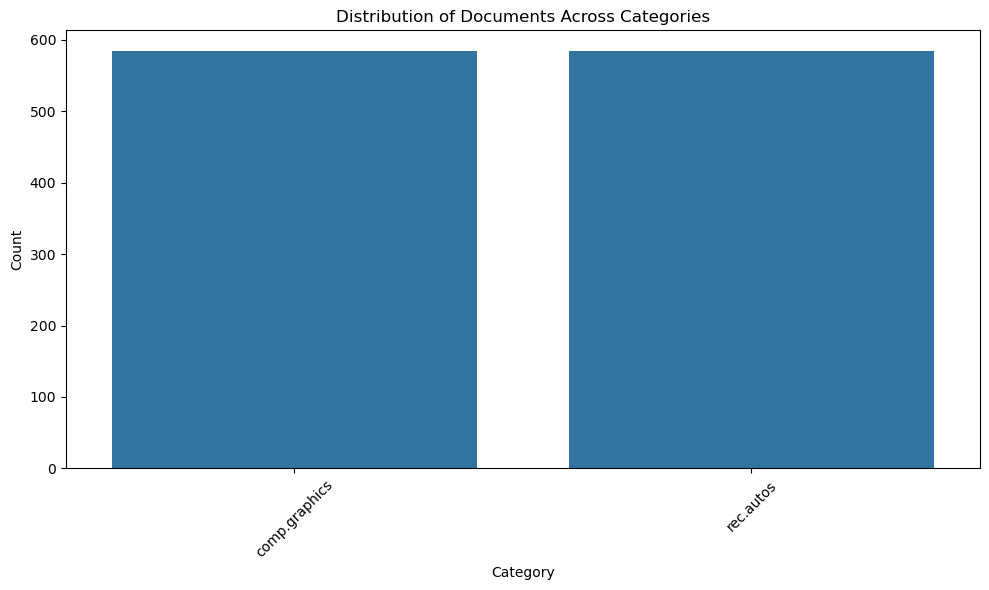

In [6]:
import seaborn as sns

import matplotlib.pyplot as plt

print("Dataset shape:", df.shape)
print("\nColumns and data types:")
print(df.dtypes)

print("\nMissing values per column:")
print(df.isnull().sum())

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='label_text')
plt.xticks(rotation=45)
plt.title('Distribution of Documents Across Categories')
plt.xlabel('Category')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

## Data preprocessing
In this step the goal is to remove unwanted characters from the dataset, the ones that might negatively impact or at least have no value in the machine learning task.

In [7]:
import re

def special_char_remover(text):
    total_chars = len(text)
    
    text_clean = re.sub(r'[^a-zA-Z0-9\s.,!?-]', '', text)
    special_chars_removed = total_chars - len(text_clean)
    
    return text_clean, special_chars_removed, total_chars

results = df['data'].apply(special_char_remover)

df['no_special_char'] = results.apply(lambda x: x[0])
df['special_char_removed'] = results.apply(lambda x: x[1])
df['original_chars'] = results.apply(lambda x: x[2])

print("Preprocessing Statistics:")
print(f"Total characters in dataset: {df['original_chars'].sum():,}")
print(f"Total special chars filtered: {df['special_char_removed'].sum():,}")
print(f"Percentage of special chars: {(df['special_char_removed'].sum() / df['original_chars'].sum() * 100):.2f}%")
print(f"Average special chars per document: {df['special_char_removed'].mean():.2f}")

print("\nExamples where special characters were found:")
special_rows = df[df['special_char_removed'] > 0].head(2)
for idx, row in special_rows.iterrows():
    print(f"Total chars: {row['original_chars']:,}")
    print(f"Special chars removed: {row['special_char_removed']:,} ({row['special_char_removed']/row['original_chars']*100:.2f}%)")
    print(f"==============Original==============\n {row['data'][:200]}...")
    print(f"==============Processed==============\n {row['no_special_char'][:200]}...")

Preprocessing Statistics:
Total characters in dataset: 1,752,822
Total special chars filtered: 79,633
Percentage of special chars: 4.54%
Average special chars per document: 68.18

Examples where special characters were found:
Total chars: 966
Special chars removed: 34 (3.52%)
==============Original==============
 From: dave.mikelson@almac.co.uk (Dave Mikelson) 
Subject: Re: PCX
Distribution: world
Organization: Almac BBS Ltd. +44 (0)324 665371
Reply-To: dave.mikelson@almac.co.uk (Dave Mikelson) 
Lines: 22

To:...
==============Processed==============
 From dave.mikelsonalmac.co.uk Dave Mikelson 
Subject Re PCX
Distribution world
Organization Almac BBS Ltd. 44 0324 665371
Reply-To dave.mikelsonalmac.co.uk Dave Mikelson 
Lines 22

To ad994Freenet.car...
Total chars: 845
Special chars removed: 17 (2.01%)
==============Original==============
 From: scott@osi.com (Scott Fleming)
Subject: Sun IPX root window display - background picture
Keywords: sun ipx background picture
Organization: Obje

In [8]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

nltk.download('punkt')
nltk.download('stopwords')

def stop_words_remover(text):
    stop_words = set(stopwords.words('english'))
    
    words = word_tokenize(text.lower())
    
    total_words = len(words)
    
    filtered_words = [word for word in words if word not in stop_words]
    stops_removed = total_words - len(filtered_words)
    
    processed_text = ' '.join(filtered_words)
    
    return processed_text, stops_removed, total_words

results = df['no_special_char'].apply(stop_words_remover)

df['no_special_char_stops'] = results.apply(lambda x: x[0])
df['stops_removed'] = results.apply(lambda x: x[1])
df['original'] = results.apply(lambda x: x[2])

print("Stop Words Removal Statistics:")
print(f"Total words in dataset: {df['original'].sum():,}")
print(f"Total stop words removed: {df['stops_removed'].sum():,}")
print(f"Percentage of stop words: {(df['stops_removed'].sum() / df['original'].sum() * 100):.2f}%")
print(f"Average stop words per document: {df['stops_removed'].mean():.2f}")

print("\nExamples of stop words removal:")
example_rows = df.head(2)
for idx, row in example_rows.iterrows():
    print(f"Total words: {row['original']}")
    print(f"Stop words removed: {row['stops_removed']} ({row['stops_removed']/row['original']*100:.2f}%)")
    print(f"==============Original==============\n {row['no_special_char'][:200]}...")
    print(f"==============Processed==============\n {row['no_special_char_stops'][:200]}...")

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/madnanrizqu/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/madnanrizqu/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Stop Words Removal Statistics:
Total words in dataset: 294,041
Total stop words removed: 99,763
Percentage of stop words: 33.93%
Average stop words per document: 85.41

Examples of stop words removal:
Total words: 152
Stop words removed: 48 (31.58%)
==============Original==============
 From dave.mikelsonalmac.co.uk Dave Mikelson 
Subject Re PCX
Distribution world
Organization Almac BBS Ltd. 44 0324 665371
Reply-To dave.mikelsonalmac.co.uk Dave Mikelson 
Lines 22

To ad994Freenet.car...
==============Processed==============
 dave.mikelsonalmac.co.uk dave mikelson subject pcx distribution world organization almac bbs ltd. 44 0324 665371 reply-to dave.mikelsonalmac.co.uk dave mikelson lines 22 ad994freenet.carleton.ca jw 1 ...
Total words: 163
Stop words removed: 52 (31.90%)
==============Original==============
 From scottosi.com Scott Fleming
Subject Sun IPX root window display - background picture
Keywords sun ipx background picture
Organization Objective Systems Integrators, Folsom Ca

In [9]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
import numpy as np

vectorizer = CountVectorizer(
    max_features=20000,
)

X = vectorizer.fit_transform(df['no_special_char_stops'])

vocab_df = pd.DataFrame(
    X.toarray(),
    columns=vectorizer.get_feature_names_out()
)

print("\nVectorization Statistics:")
print(f"Number of documents: {X.shape[0]}")
print(f"Vocabulary size: {X.shape[1]}")
print(f"Total words: {X.sum():,}")

word_counts = np.asarray(X.sum(axis=0)).ravel()
word_freq = pd.DataFrame({
    'term': vectorizer.get_feature_names_out(),
    'count': word_counts
})
print("\nTop 10 most frequent terms:")
print(word_freq.sort_values('count', ascending=False).head(10))


Vectorization Statistics:
Number of documents: 1168
Vocabulary size: 20000
Total words: 166,513

Top 10 most frequent terms:
               term  count
7238            edu   2002
5128            com   1278
16948       subject   1239
11242         lines   1233
13224  organization   1152
4389            car    873
3103        article    735
19578         would    722
19603        writes    720
18466    university    628


## Dataset split
In this step we want to have a split where more data is allocated to the training set but enough data is there to evaluate the model properly in the test set.

In [10]:
from sklearn.model_selection import train_test_split

# Split the data
X = df['no_special_char_stops']
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

print(f"Length of X_train: {len(X_train)}")
print(f"Length of y_train: {len(y_train)}")
print(f"Length of X_test: {len(X_test)}")
print(f"Length of y_test: {len(y_test)}")

print("\nLabels in y_train:")
print(y_train.value_counts())
print("\nLabels in y_test:")
print(y_test.value_counts())

Length of X_train: 934
Length of y_train: 934
Length of X_test: 234
Length of y_test: 234

Labels in y_train:
label
1    474
0    460
Name: count, dtype: int64

Labels in y_test:
label
0    124
1    110
Name: count, dtype: int64


## Vectorization
In this step we transform the text into numerical representations that can be consumed by the computer and by extension the machine learning algorithms.


In [11]:
import numpy as np
from nltk.tokenize import word_tokenize
import nltk
from gensim.models import Word2Vec

# Download nltk resources if not already downloaded
nltk.download('punkt', quiet=True)

print("Loading pre-trained Word2Vec model...")
try:
    import gensim.downloader as api
    print("Downloading model...")
    w2v_model = api.load("word2vec-google-news-300")
    print("Model loaded successfully")
except Exception as e:
    # If the file is not found, use a smaller model from gensim's downloader
    print(f"Failed to download model: {str(e)}")
    w2v_model = None    

def get_doc_vector(text, model, vector_size=300):
    tokens = word_tokenize(text.lower())
    vectors = [model[word] for word in tokens if word in model]
    if vectors:
        return np.mean(vectors, axis=0)
    else:
        return np.zeros(vector_size)
    
print("Generating word2vec representation using pre-trained model...")
X_train_w2v = np.array([get_doc_vector(text, w2v_model) for text in X_train])
X_test_w2v = np.array([get_doc_vector(text, w2v_model) for text in X_test])

Loading pre-trained Word2Vec model...
Model loaded successfully
Generating word2vec representation using pre-trained model...


In [12]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer 

vectorizer = CountVectorizer(max_features=20000)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

tfidf_vectorizer = TfidfVectorizer(max_features=20000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

## Base experiment
In this step the goal is to know the accuracy without:
1. early stopping
2. dropout
3. regularization
4. batch normalization

Weights initialization is used here to make sure all layers weights are not randomized, ensuring reproduceability

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np
import tensorflow as tf

np.random.seed(42)
np.random.seed(42)
tf.random.set_seed(42)

X_train_vec_dense = X_train_vec.toarray()
X_train_vec_dense = X_train_vec.toarray()
X_test_vec_dense = X_test_vec.toarray()
X_train_tfidf_dense = X_train_tfidf.toarray()
X_test_tfidf_dense = X_test_tfidf.toarray()
y_train_cat = to_categorical(y_train)
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

print("Training Neural Network with BoW features...")
model = Sequential([
      Dense(32, activation='relu', input_shape=(X_train_vec_dense.shape[1],), 
              kernel_initializer=tf.keras.initializers.GlorotUniform(seed=42)),
      Dense(4, activation='relu', 
              kernel_initializer=tf.keras.initializers.GlorotUniform(seed=42)),
      Dense(2, activation='softmax', 
              kernel_initializer=tf.keras.initializers.GlorotUniform(seed=42))
])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train_vec_dense, y_train_cat, epochs=5, batch_size=32, verbose=0)

print("Training Neural Network with TF-IDF features...")
tfidf_model = Sequential([
      Dense(32, activation='relu', input_shape=(X_train_tfidf_dense.shape[1],), 
              kernel_initializer=tf.keras.initializers.GlorotUniform(seed=42)),
      Dense(4, activation='relu', 
              kernel_initializer=tf.keras.initializers.GlorotUniform(seed=42)),
      Dense(2, activation='softmax', 
              kernel_initializer=tf.keras.initializers.GlorotUniform(seed=42))
])
tfidf_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
tfidf_model.fit(X_train_tfidf_dense, y_train_cat, epochs=5, batch_size=32, verbose=0)

print("Training Neural Network with Word2Vec features...")
w2v_model_lr = Sequential([
      Dense(32, activation='relu', input_shape=(X_train_w2v.shape[1],), 
              kernel_initializer=tf.keras.initializers.GlorotUniform(seed=42)),
      Dense(4, activation='relu', 
              kernel_initializer=tf.keras.initializers.GlorotUniform(seed=42)),
      Dense(2, activation='softmax', 
              kernel_initializer=tf.keras.initializers.GlorotUniform(seed=42))
])
w2v_model_lr.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
w2v_model_lr.fit(X_train_w2v, y_train_cat, epochs=5, batch_size=32, verbose=0)

print("Testing ann models...")
y_pred_proba = model.predict(X_test_vec_dense)
y_pred_proba = model.predict(X_test_vec_dense)
y_pred_labels = np.argmax(y_pred_proba, axis=1)
accuracy = accuracy_score(y_test, y_pred_labels)
precision = precision_score(y_test, y_pred_labels, average='weighted')
recall = recall_score(y_test, y_pred_labels, average='weighted')
f1 = f1_score(y_test, y_pred_labels, average='weighted')

y_pred_tfidf_proba = tfidf_model.predict(X_test_tfidf_dense)
y_pred_tfidf_labels = np.argmax(y_pred_tfidf_proba, axis=1)
accuracy_tfidf = accuracy_score(y_test, y_pred_tfidf_labels)
precision_tfidf = precision_score(y_test, y_pred_tfidf_labels, average='weighted')
recall_tfidf = recall_score(y_test, y_pred_tfidf_labels, average='weighted')
f1_tfidf = f1_score(y_test, y_pred_tfidf_labels, average='weighted')

y_pred_w2v_proba = w2v_model_lr.predict(X_test_w2v)
y_pred_w2v_labels = np.argmax(y_pred_w2v_proba, axis=1)
accuracy_w2v = accuracy_score(y_test, y_pred_w2v_labels)
precision_w2v = precision_score(y_test, y_pred_w2v_labels, average='weighted')
recall_w2v = recall_score(y_test, y_pred_w2v_labels, average='weighted')
f1_w2v = f1_score(y_test, y_pred_w2v_labels, average='weighted')

print("\nModel Comparison:")
print("CountVectorizer + Neural Network:")
print(f"  Accuracy:  {accuracy:.4f}")
print(f"  Precision: {precision:.4f}")
print(f"  Recall:    {recall:.4f}")
print(f"  F1-Score:  {f1:.4f}")
print("\nTF-IDF + Neural Network:")
print(f"  Accuracy:  {accuracy_tfidf:.4f}")
print(f"  Precision: {precision_tfidf:.4f}")
print(f"  Recall:    {recall_tfidf:.4f}")
print(f"  F1-Score:  {f1_tfidf:.4f}")
print("\nWord2Vec + Neural Network:")
print(f"  Accuracy:  {accuracy_w2v:.4f}")
print(f"  Precision: {precision_w2v:.4f}")
print(f"  Recall:    {recall_w2v:.4f}")
print(f"  F1-Score:  {f1_w2v:.4f}")

Training Neural Network with BoW features...


2025-03-15 13:26:20.822969: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


Training Neural Network with TF-IDF features...
Training Neural Network with Word2Vec features...
Testing ann models...
8/8 [==============================] - 0s 459us/step

Model Comparison:
CountVectorizer + Neural Network:
  Accuracy:  0.9829
  Precision: 0.9831
  Recall:    0.9829
  F1-Score:  0.9829

TF-IDF + Neural Network:
  Accuracy:  0.9829
  Precision: 0.9829
  Recall:    0.9829
  F1-Score:  0.9829

Word2Vec + Neural Network:
  Accuracy:  0.9530
  Precision: 0.9539
  Recall:    0.9530
  F1-Score:  0.9530


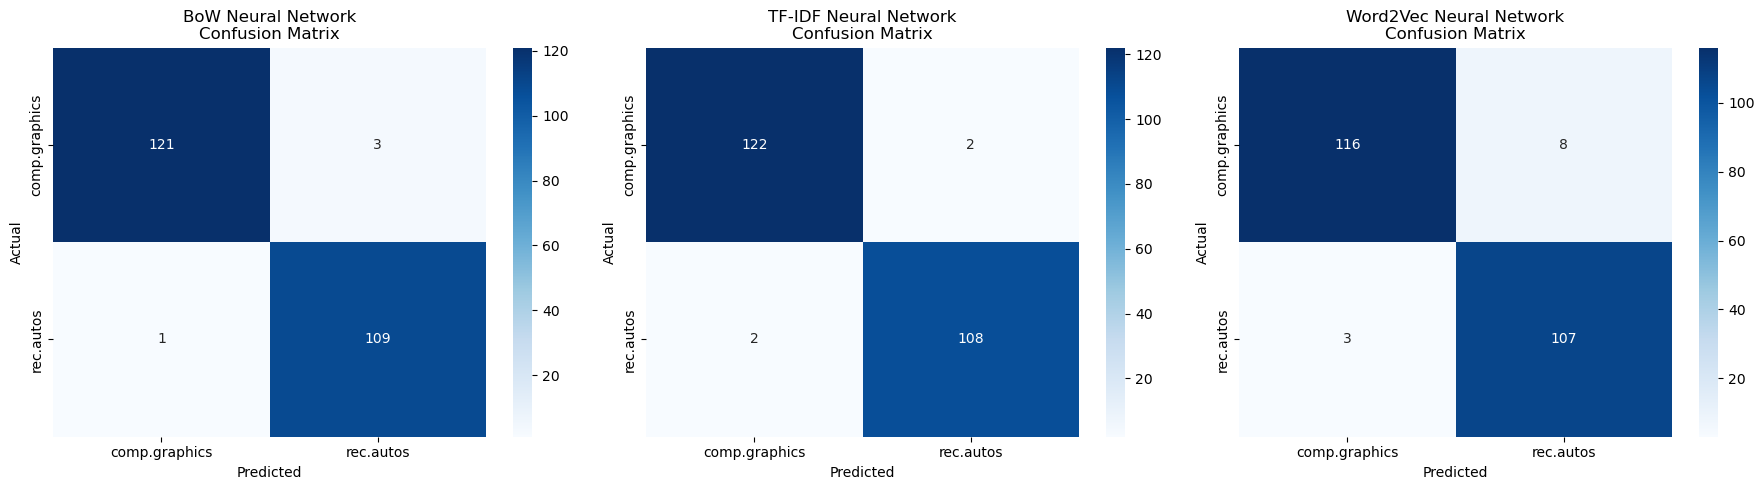

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

class_names = ['comp.graphics', 'rec.autos']

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

cm_bow = confusion_matrix(y_test, y_pred_labels)
sns.heatmap(cm_bow, annot=True, fmt='d', cmap='Blues', 
           xticklabels=class_names, yticklabels=class_names, ax=axes[0])
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')
axes[0].set_title('BoW Neural Network\nConfusion Matrix')

cm_tfidf = confusion_matrix(y_test, y_pred_tfidf_labels)
sns.heatmap(cm_tfidf, annot=True, fmt='d', cmap='Blues', 
           xticklabels=class_names, yticklabels=class_names, ax=axes[1])
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('Actual')
axes[1].set_title('TF-IDF Neural Network\nConfusion Matrix')

cm_w2v = confusion_matrix(y_test, y_pred_w2v_labels)
sns.heatmap(cm_w2v, annot=True, fmt='d', cmap='Blues', 
           xticklabels=class_names, yticklabels=class_names, ax=axes[2])
axes[2].set_xlabel('Predicted')
axes[2].set_ylabel('Actual')
axes[2].set_title('Word2Vec Neural Network\nConfusion Matrix')

plt.tight_layout()
plt.show()

## Dropout
In this step, the effects of dropout towards performance is explored. Other variables are left the same as the base experiment

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np
import tensorflow as tf

np.random.seed(42)
tf.random.set_seed(42)

X_train_vec_dense = X_train_vec.toarray()
X_test_vec_dense = X_test_vec.toarray()
X_train_tfidf_dense = X_train_tfidf.toarray()
X_test_tfidf_dense = X_test_tfidf.toarray()

y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

print("Training Neural Network with BoW features and dropout...")
model = Sequential([
    Dense(32, activation='relu', input_shape=(X_train_vec_dense.shape[1],), 
          kernel_initializer=tf.keras.initializers.GlorotUniform(seed=42)),
    Dropout(0.2),  # Add dropout layer with 20% rate
    Dense(4, activation='relu', 
          kernel_initializer=tf.keras.initializers.GlorotUniform(seed=42)),
    Dropout(0.1),  # Add dropout layer with 10% rate
    Dense(2, activation='softmax', 
          kernel_initializer=tf.keras.initializers.GlorotUniform(seed=42))
])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train_vec_dense, y_train_cat, epochs=5, batch_size=32, verbose=0)

print("Training Neural Network with TF-IDF features and dropout...")
tfidf_model = Sequential([
    Dense(32, activation='relu', input_shape=(X_train_tfidf_dense.shape[1],), 
          kernel_initializer=tf.keras.initializers.GlorotUniform(seed=42)),
    Dropout(0.2),  # Add dropout layer with 20% rate
    Dense(4, activation='relu', 
          kernel_initializer=tf.keras.initializers.GlorotUniform(seed=42)),
    Dropout(0.1),  # Add dropout layer with 10% rate
    Dense(2, activation='softmax', 
          kernel_initializer=tf.keras.initializers.GlorotUniform(seed=42))
])
tfidf_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
tfidf_model.fit(X_train_tfidf_dense, y_train_cat, epochs=5, batch_size=32, verbose=0)

print("Training Neural Network with Word2Vec features and dropout...")
w2v_model_lr = Sequential([
    Dense(32, activation='relu', input_shape=(X_train_w2v.shape[1],), 
          kernel_initializer=tf.keras.initializers.GlorotUniform(seed=42)),
    Dropout(0.2),  # Add dropout layer with 20% rate
    Dense(4, activation='relu', 
          kernel_initializer=tf.keras.initializers.GlorotUniform(seed=42)),
    Dropout(0.1),  # Add dropout layer with 10% rate
    Dense(2, activation='softmax', 
          kernel_initializer=tf.keras.initializers.GlorotUniform(seed=42))
])
w2v_model_lr.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
w2v_model_lr.fit(X_train_w2v, y_train_cat, epochs=5, batch_size=32, verbose=0)

print("Testing ann models with dropout...")

y_pred_proba = model.predict(X_test_vec_dense)
y_pred_labels = np.argmax(y_pred_proba, axis=1)
drp_accuracy = accuracy_score(y_test, y_pred_labels)
drp_precision = precision_score(y_test, y_pred_labels, average='weighted')
drp_recall = recall_score(y_test, y_pred_labels, average='weighted')
drp_f1 = f1_score(y_test, y_pred_labels, average='weighted')

y_pred_tfidf_proba = tfidf_model.predict(X_test_tfidf_dense)
y_pred_tfidf_labels = np.argmax(y_pred_tfidf_proba, axis=1)
drp_accuracy_tfidf = accuracy_score(y_test, y_pred_tfidf_labels)
drp_precision_tfidf = precision_score(y_test, y_pred_tfidf_labels, average='weighted')
drp_recall_tfidf = recall_score(y_test, y_pred_tfidf_labels, average='weighted')
drp_f1_tfidf = f1_score(y_test, y_pred_tfidf_labels, average='weighted')

y_pred_w2v_proba = w2v_model_lr.predict(X_test_w2v)
y_pred_w2v_labels = np.argmax(y_pred_w2v_proba, axis=1)
drp_accuracy_w2v = accuracy_score(y_test, y_pred_w2v_labels)
drp_precision_w2v = precision_score(y_test, y_pred_w2v_labels, average='weighted')
drp_recall_w2v = recall_score(y_test, y_pred_w2v_labels, average='weighted')
drp_f1_w2v = f1_score(y_test, y_pred_w2v_labels, average='weighted')

print("\nModel Comparison (with Dropout):")
print("CountVectorizer + Neural Network:")
print(f"  Accuracy:  {drp_accuracy:.4f}")
print(f"  Precision: {drp_precision:.4f}")
print(f"  Recall:    {drp_recall:.4f}")
print(f"  F1-Score:  {drp_f1:.4f}")
print("\nTF-IDF + Neural Network:")
print(f"  Accuracy:  {drp_accuracy_tfidf:.4f}")
print(f"  Precision: {drp_precision_tfidf:.4f}")
print(f"  Recall:    {drp_recall_tfidf:.4f}")
print(f"  F1-Score:  {drp_f1_tfidf:.4f}")
print("\nWord2Vec + Neural Network:")
print(f"  Accuracy:  {drp_accuracy_w2v:.4f}")
print(f"  Precision: {drp_precision_w2v:.4f}")
print(f"  Recall:    {drp_recall_w2v:.4f}")
print(f"  F1-Score:  {drp_f1_w2v:.4f}")

print("\nPercentage Changes from Base Experiment:")
print("CountVectorizer + Neural Network:")
print(f"  Accuracy:  {((drp_accuracy - accuracy) / accuracy * 100):.2f}%")
print(f"  Precision: {((drp_precision - precision) / precision * 100):.2f}%")
print(f"  Recall:    {((drp_recall - recall) / recall * 100):.2f}%")
print(f"  F1-Score:  {((drp_f1 - f1) / f1 * 100):.2f}%")
print("\nTF-IDF + Neural Network:")
print(f"  Accuracy:  {((drp_accuracy_tfidf - accuracy_tfidf) / accuracy_tfidf * 100):.2f}%")
print(f"  Precision: {((drp_precision_tfidf - precision_tfidf) / precision_tfidf * 100):.2f}%")
print(f"  Recall:    {((drp_recall_tfidf - recall_tfidf) / recall_tfidf * 100):.2f}%")
print(f"  F1-Score:  {((drp_f1_tfidf - f1_tfidf) / f1_tfidf * 100):.2f}%")
print("\nWord2Vec + Neural Network:")
print(f"  Accuracy:  {((drp_accuracy_w2v - accuracy_w2v) / accuracy_w2v * 100):.2f}%")
print(f"  Precision: {((drp_precision_w2v - precision_w2v) / precision_w2v * 100):.2f}%")
print(f"  Recall:    {((drp_recall_w2v - recall_w2v) / recall_w2v * 100):.2f}%")
print(f"  F1-Score:  {((drp_f1_w2v - f1_w2v) / f1_w2v * 100):.2f}%")

Training Neural Network with BoW features and dropout...
Training Neural Network with TF-IDF features and dropout...
Training Neural Network with Word2Vec features and dropout...
Testing ann models with dropout...
8/8 [==============================] - 0s 395us/step

Model Comparison (with Dropout):
CountVectorizer + Neural Network:
  Accuracy:  0.9829
  Precision: 0.9831
  Recall:    0.9829
  F1-Score:  0.9829

TF-IDF + Neural Network:
  Accuracy:  0.9872
  Precision: 0.9872
  Recall:    0.9872
  F1-Score:  0.9872

Word2Vec + Neural Network:
  Accuracy:  0.9573
  Precision: 0.9579
  Recall:    0.9573
  F1-Score:  0.9573

Percentage Changes from Base Experiment:
CountVectorizer + Neural Network:
  Accuracy:  0.00%
  Precision: 0.00%
  Recall:    0.00%
  F1-Score:  0.00%

TF-IDF + Neural Network:
  Accuracy:  0.43%
  Precision: 0.44%
  Recall:    0.43%
  F1-Score:  0.44%

Word2Vec + Neural Network:
  Accuracy:  0.45%
  Precision: 0.41%
  Recall:    0.45%
  F1-Score:  0.45%


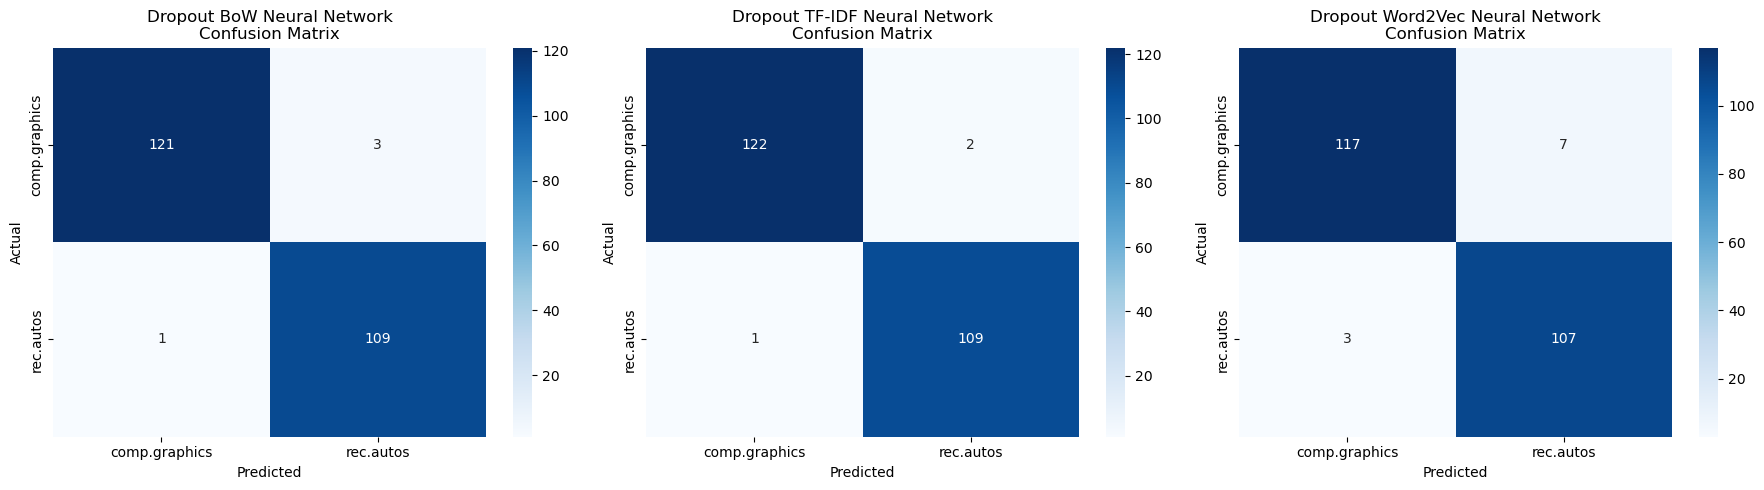

In [16]:

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

class_names = ['comp.graphics', 'rec.autos']

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

cm_bow = confusion_matrix(y_test, y_pred_labels)
sns.heatmap(cm_bow, annot=True, fmt='d', cmap='Blues', 
           xticklabels=class_names, yticklabels=class_names, ax=axes[0])
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')
axes[0].set_title('Dropout BoW Neural Network\nConfusion Matrix')

cm_tfidf = confusion_matrix(y_test, y_pred_tfidf_labels)
sns.heatmap(cm_tfidf, annot=True, fmt='d', cmap='Blues', 
           xticklabels=class_names, yticklabels=class_names, ax=axes[1])
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('Actual')
axes[1].set_title('Dropout TF-IDF Neural Network\nConfusion Matrix')

cm_w2v = confusion_matrix(y_test, y_pred_w2v_labels)
sns.heatmap(cm_w2v, annot=True, fmt='d', cmap='Blues', 
           xticklabels=class_names, yticklabels=class_names, ax=axes[2])
axes[2].set_xlabel('Predicted')
axes[2].set_ylabel('Actual')
axes[2].set_title('Dropout Word2Vec Neural Network\nConfusion Matrix')

plt.tight_layout()
plt.show()

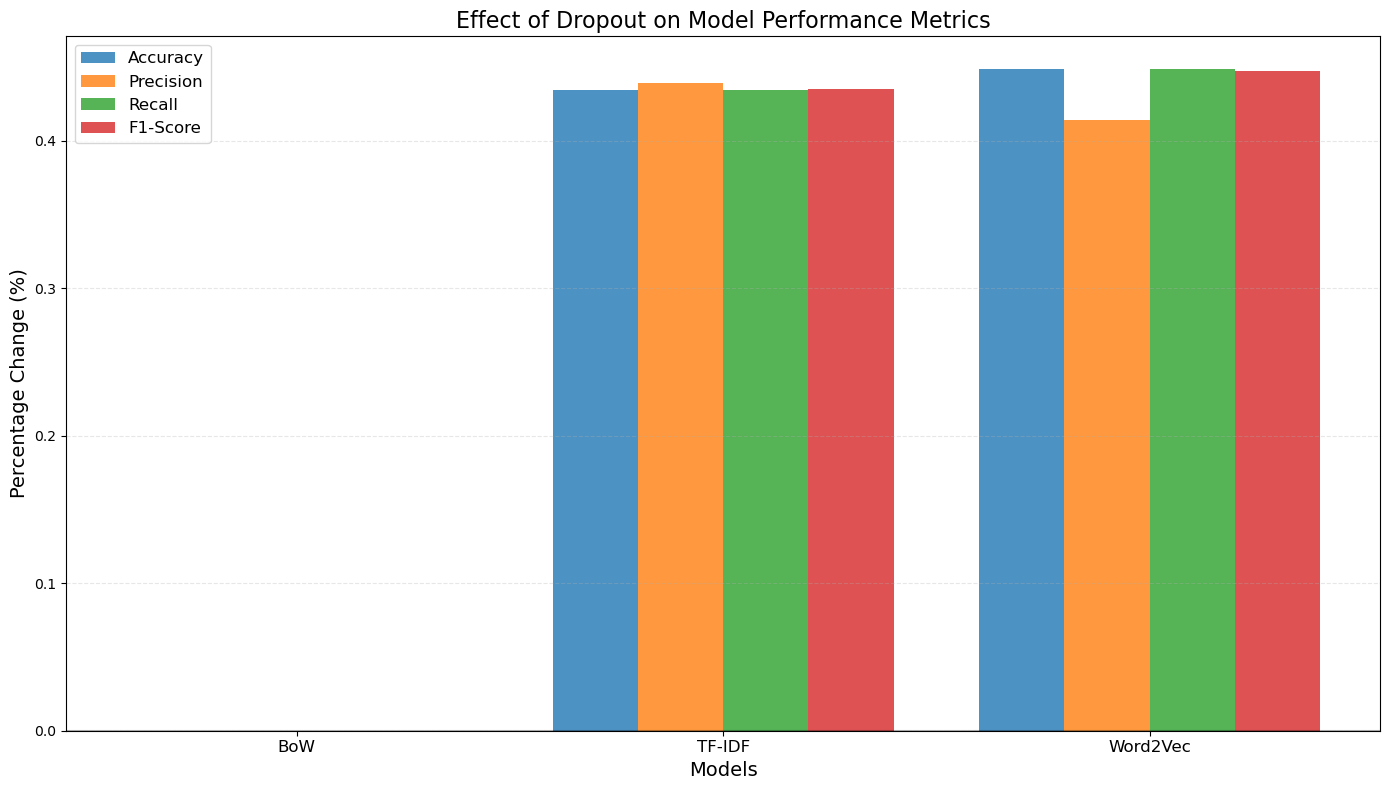

In [17]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

percentage_changes = {
    'BoW': {
        'Accuracy': ((drp_accuracy - accuracy) / accuracy * 100),
        'Precision': ((drp_precision - precision) / precision * 100),
        'Recall': ((drp_recall - recall) / recall * 100),
        'F1-Score': ((drp_f1 - f1) / f1 * 100)
    },
    'TF-IDF': {
        'Accuracy': ((drp_accuracy_tfidf - accuracy_tfidf) / accuracy_tfidf * 100),
        'Precision': ((drp_precision_tfidf - precision_tfidf) / precision_tfidf * 100),
        'Recall': ((drp_recall_tfidf - recall_tfidf) / recall_tfidf * 100),
        'F1-Score': ((drp_f1_tfidf - f1_tfidf) / f1_tfidf * 100)
    },
    'Word2Vec': {
        'Accuracy': ((drp_accuracy_w2v - accuracy_w2v) / accuracy_w2v * 100),
        'Precision': ((drp_precision_w2v - precision_w2v) / precision_w2v * 100),
        'Recall': ((drp_recall_w2v - recall_w2v) / recall_w2v * 100),
        'F1-Score': ((drp_f1_w2v - f1_w2v) / f1_w2v * 100)
    }
}

df = pd.DataFrame(percentage_changes)

plt.figure(figsize=(14, 8))

bar_width = 0.2
models = list(percentage_changes.keys())
metrics = list(percentage_changes['BoW'].keys())
x = np.arange(len(models))

for i, metric in enumerate(metrics):
    values = [percentage_changes[model][metric] for model in models]
    plt.bar(x + i * bar_width, values, width=bar_width, 
            label=metric, alpha=0.8)

plt.xlabel('Models', fontsize=14)
plt.ylabel('Percentage Change (%)', fontsize=14)
plt.title('Effect of Dropout on Model Performance Metrics', fontsize=16)
plt.xticks(x + bar_width * 1.5, models, fontsize=12)
plt.axhline(y=0, color='black', linestyle='-', alpha=0.3)  # Zero line
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.legend(fontsize=12)

plt.tight_layout()
plt.show()

## L2 Regularization
In this step, the effects of L2 regularization towards performance is explored. Other variables are left the same as the base experiment

In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.regularizers import l2
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np
import tensorflow as tf

np.random.seed(42)
tf.random.set_seed(42)

X_train_vec_dense = X_train_vec.toarray()
X_test_vec_dense = X_test_vec.toarray()
X_train_tfidf_dense = X_train_tfidf.toarray()
X_test_tfidf_dense = X_test_tfidf.toarray()

y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

l2_factor = 0.005

print("Training Neural Network with BoW features and L2 regularization...")
model = Sequential([
      Dense(32, activation='relu', input_shape=(X_train_vec_dense.shape[1],), 
              kernel_initializer=tf.keras.initializers.GlorotUniform(seed=42),
              kernel_regularizer=l2(l2_factor)),
      Dense(4, activation='relu', 
              kernel_initializer=tf.keras.initializers.GlorotUniform(seed=42),
              kernel_regularizer=l2(l2_factor)),
      Dense(2, activation='softmax', 
              kernel_initializer=tf.keras.initializers.GlorotUniform(seed=42),
              kernel_regularizer=l2(l2_factor))
])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train_vec_dense, y_train_cat, epochs=5, batch_size=32, verbose=0)

print("Training Neural Network with TF-IDF features and L2 regularization...")
tfidf_model = Sequential([
      Dense(32, activation='relu', input_shape=(X_train_tfidf_dense.shape[1],), 
              kernel_initializer=tf.keras.initializers.GlorotUniform(seed=42),
              kernel_regularizer=l2(l2_factor)),
      Dense(4, activation='relu', 
              kernel_initializer=tf.keras.initializers.GlorotUniform(seed=42),
              kernel_regularizer=l2(l2_factor)),
      Dense(2, activation='softmax', 
              kernel_initializer=tf.keras.initializers.GlorotUniform(seed=42),
              kernel_regularizer=l2(l2_factor))
])
tfidf_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
tfidf_model.fit(X_train_tfidf_dense, y_train_cat, epochs=5, batch_size=32, verbose=0)

print("Training Neural Network with Word2Vec features and L2 regularization...")
w2v_model_lr = Sequential([
      Dense(32, activation='relu', input_shape=(X_train_w2v.shape[1],), 
              kernel_initializer=tf.keras.initializers.GlorotUniform(seed=42),
              kernel_regularizer=l2(l2_factor)),
      Dense(4, activation='relu', 
              kernel_initializer=tf.keras.initializers.GlorotUniform(seed=42),
              kernel_regularizer=l2(l2_factor)),
      Dense(2, activation='softmax', 
              kernel_initializer=tf.keras.initializers.GlorotUniform(seed=42),
              kernel_regularizer=l2(l2_factor))
])
w2v_model_lr.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
w2v_model_lr.fit(X_train_w2v, y_train_cat, epochs=5, batch_size=32, verbose=0)

print("Testing ann models with L2 regularization...")

y_pred_proba = model.predict(X_test_vec_dense)
y_pred_labels = np.argmax(y_pred_proba, axis=1)
l2_accuracy = accuracy_score(y_test, y_pred_labels)
l2_precision = precision_score(y_test, y_pred_labels, average='weighted')
l2_recall = recall_score(y_test, y_pred_labels, average='weighted')
l2_f1 = f1_score(y_test, y_pred_labels, average='weighted')

y_pred_tfidf_proba = tfidf_model.predict(X_test_tfidf_dense)
y_pred_tfidf_labels = np.argmax(y_pred_tfidf_proba, axis=1)
l2_accuracy_tfidf = accuracy_score(y_test, y_pred_tfidf_labels)
l2_precision_tfidf = precision_score(y_test, y_pred_tfidf_labels, average='weighted')
l2_recall_tfidf = recall_score(y_test, y_pred_tfidf_labels, average='weighted')
l2_f1_tfidf = f1_score(y_test, y_pred_tfidf_labels, average='weighted')

y_pred_w2v_proba = w2v_model_lr.predict(X_test_w2v)
y_pred_w2v_labels = np.argmax(y_pred_w2v_proba, axis=1)
l2_accuracy_w2v = accuracy_score(y_test, y_pred_w2v_labels)
l2_precision_w2v = precision_score(y_test, y_pred_w2v_labels, average='weighted')
l2_recall_w2v = recall_score(y_test, y_pred_w2v_labels, average='weighted')
l2_f1_w2v = f1_score(y_test, y_pred_w2v_labels, average='weighted')

print("\nModel Comparison (with L2 Regularization):")
print("CountVectorizer + Neural Network:")
print(f"  Accuracy:  {l2_accuracy:.4f}")
print(f"  Precision: {l2_precision:.4f}")
print(f"  Recall:    {l2_recall:.4f}")
print(f"  F1-Score:  {l2_f1:.4f}")
print("\nTF-IDF + Neural Network:")
print(f"  Accuracy:  {l2_accuracy_tfidf:.4f}")
print(f"  Precision: {l2_precision_tfidf:.4f}")
print(f"  Recall:    {l2_recall_tfidf:.4f}")
print(f"  F1-Score:  {l2_f1_tfidf:.4f}")
print("\nWord2Vec + Neural Network:")
print(f"  Accuracy:  {l2_accuracy_w2v:.4f}")
print(f"  Precision: {l2_precision_w2v:.4f}")
print(f"  Recall:    {l2_recall_w2v:.4f}")
print(f"  F1-Score:  {l2_f1_w2v:.4f}")

print("\nPercentage Changes from Base Experiment:")
print("CountVectorizer + Neural Network:")
print(f"  Accuracy:  {((l2_accuracy - accuracy) / accuracy * 100):.2f}%")
print(f"  Precision: {((l2_precision - precision) / precision * 100):.2f}%")
print(f"  Recall:    {((l2_recall - recall) / recall * 100):.2f}%")
print(f"  F1-Score:  {((l2_f1 - f1) / f1 * 100):.2f}%")
print("\nTF-IDF + Neural Network:")
print(f"  Accuracy:  {((l2_accuracy_tfidf - accuracy_tfidf) / accuracy_tfidf * 100):.2f}%")
print(f"  Precision: {((l2_precision_tfidf - precision_tfidf) / precision_tfidf * 100):.2f}%")
print(f"  Recall:    {((l2_recall_tfidf - recall_tfidf) / recall_tfidf * 100):.2f}%")
print(f"  F1-Score:  {((l2_f1_tfidf - f1_tfidf) / f1_tfidf * 100):.2f}%")
print("\nWord2Vec + Neural Network:")
print(f"  Accuracy:  {((l2_accuracy_w2v - accuracy_w2v) / accuracy_w2v * 100):.2f}%")
print(f"  Precision: {((l2_precision_w2v - precision_w2v) / precision_w2v * 100):.2f}%")
print(f"  Recall:    {((l2_recall_w2v - recall_w2v) / recall_w2v * 100):.2f}%")
print(f"  F1-Score:  {((l2_f1_w2v - f1_w2v) / f1_w2v * 100):.2f}%")

Training Neural Network with BoW features and L2 regularization...
Training Neural Network with TF-IDF features and L2 regularization...
Training Neural Network with Word2Vec features and L2 regularization...
Testing ann models with L2 regularization...
8/8 [==============================] - 0s 411us/step

Model Comparison (with L2 Regularization):
CountVectorizer + Neural Network:
  Accuracy:  0.9829
  Precision: 0.9831
  Recall:    0.9829
  F1-Score:  0.9829

TF-IDF + Neural Network:
  Accuracy:  0.9786
  Precision: 0.9787
  Recall:    0.9786
  F1-Score:  0.9786

Word2Vec + Neural Network:
  Accuracy:  0.9573
  Precision: 0.9579
  Recall:    0.9573
  F1-Score:  0.9573

Percentage Changes from Base Experiment:
CountVectorizer + Neural Network:
  Accuracy:  0.00%
  Precision: 0.00%
  Recall:    0.00%
  F1-Score:  0.00%

TF-IDF + Neural Network:
  Accuracy:  -0.43%
  Precision: -0.43%
  Recall:    -0.43%
  F1-Score:  -0.44%

Word2Vec + Neural Network:
  Accuracy:  0.45%
  Precision: 0.4

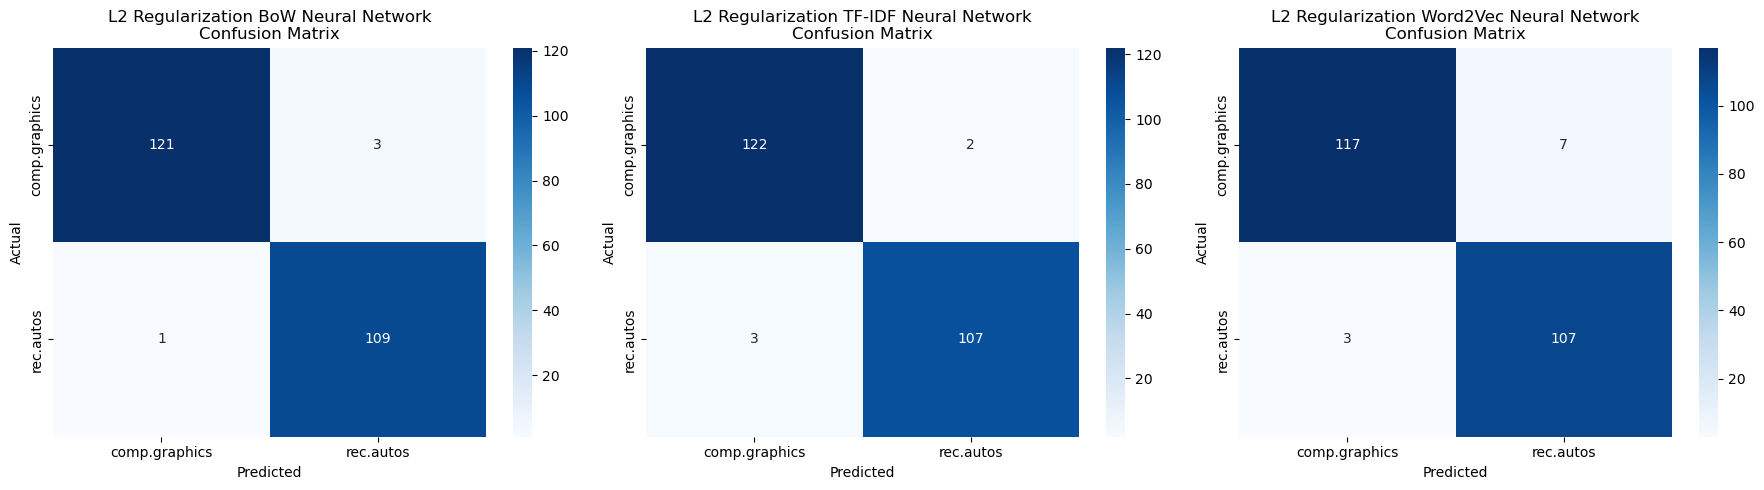

In [19]:

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix


class_names = ['comp.graphics', 'rec.autos']


fig, axes = plt.subplots(1, 3, figsize=(18, 5))


cm_bow = confusion_matrix(y_test, y_pred_labels)
sns.heatmap(cm_bow, annot=True, fmt='d', cmap='Blues', 
           xticklabels=class_names, yticklabels=class_names, ax=axes[0])
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')
axes[0].set_title('L2 Regularization BoW Neural Network\nConfusion Matrix')


cm_tfidf = confusion_matrix(y_test, y_pred_tfidf_labels)
sns.heatmap(cm_tfidf, annot=True, fmt='d', cmap='Blues', 
           xticklabels=class_names, yticklabels=class_names, ax=axes[1])
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('Actual')
axes[1].set_title('L2 Regularization TF-IDF Neural Network\nConfusion Matrix')


cm_w2v = confusion_matrix(y_test, y_pred_w2v_labels)
sns.heatmap(cm_w2v, annot=True, fmt='d', cmap='Blues', 
           xticklabels=class_names, yticklabels=class_names, ax=axes[2])
axes[2].set_xlabel('Predicted')
axes[2].set_ylabel('Actual')
axes[2].set_title('L2 Regularization Word2Vec Neural Network\nConfusion Matrix')

plt.tight_layout()
plt.show()

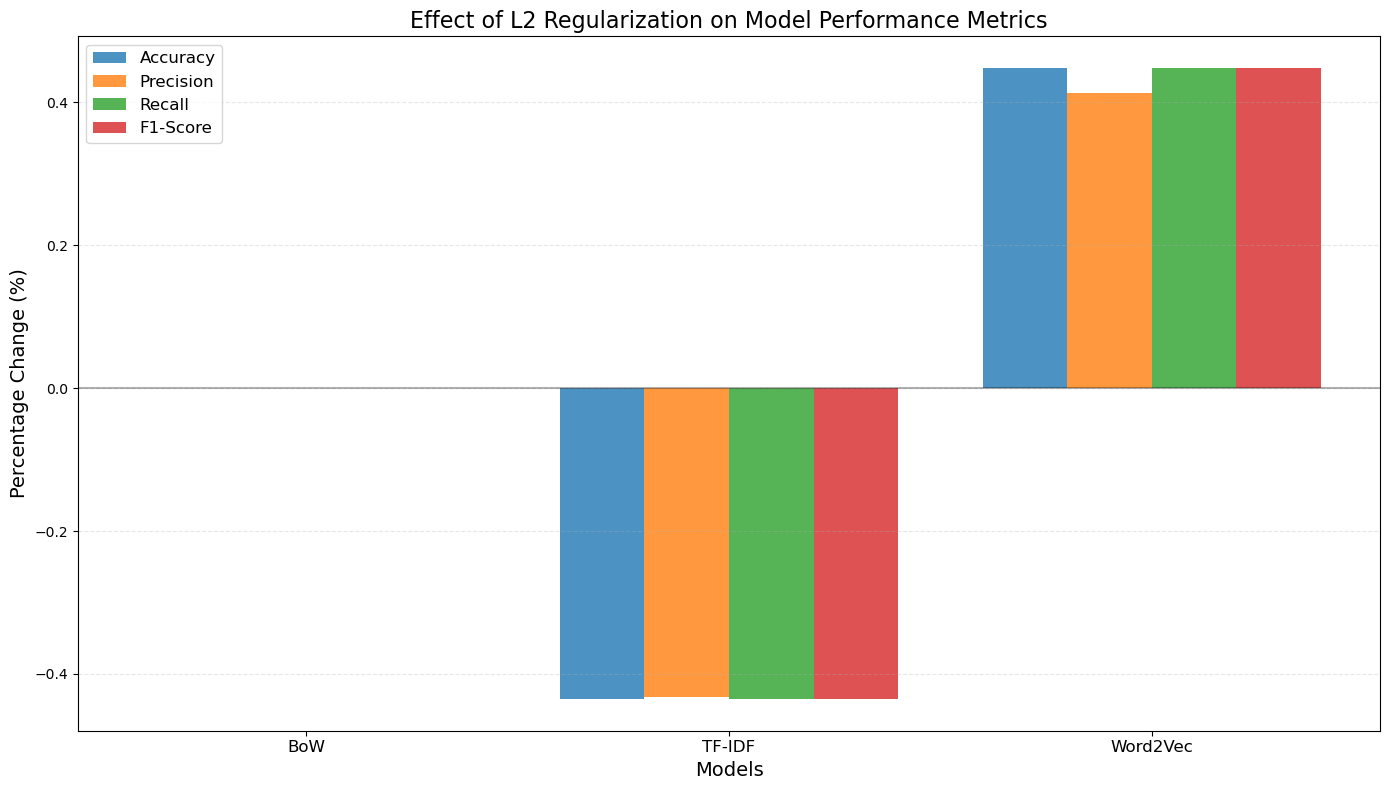

In [20]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

percentage_changes = {
    'BoW': {
        'Accuracy': ((l2_accuracy - accuracy) / accuracy * 100),
        'Precision': ((l2_precision - precision) / precision * 100),
        'Recall': ((l2_recall - recall) / recall * 100),
        'F1-Score': ((l2_f1 - f1) / f1 * 100)
    },
    'TF-IDF': {
        'Accuracy': ((l2_accuracy_tfidf - accuracy_tfidf) / accuracy_tfidf * 100),
        'Precision': ((l2_precision_tfidf - precision_tfidf) / precision_tfidf * 100),
        'Recall': ((l2_recall_tfidf - recall_tfidf) / recall_tfidf * 100),
        'F1-Score': ((l2_f1_tfidf - f1_tfidf) / f1_tfidf * 100)
    },
    'Word2Vec': {
        'Accuracy': ((l2_accuracy_w2v - accuracy_w2v) / accuracy_w2v * 100),
        'Precision': ((l2_precision_w2v - precision_w2v) / precision_w2v * 100),
        'Recall': ((l2_recall_w2v - recall_w2v) / recall_w2v * 100),
        'F1-Score': ((l2_f1_w2v - f1_w2v) / f1_w2v * 100)
    }
}

df = pd.DataFrame(percentage_changes)

plt.figure(figsize=(14, 8))

bar_width = 0.2
models = list(percentage_changes.keys())
metrics = list(percentage_changes['BoW'].keys())
x = np.arange(len(models))

for i, metric in enumerate(metrics):
    values = [percentage_changes[model][metric] for model in models]
    plt.bar(x + i * bar_width, values, width=bar_width, 
            label=metric, alpha=0.8)

plt.xlabel('Models', fontsize=14)
plt.ylabel('Percentage Change (%)', fontsize=14)
plt.title('Effect of L2 Regularization on Model Performance Metrics', fontsize=16)
plt.xticks(x + bar_width * 1.5, models, fontsize=12)
plt.axhline(y=0, color='black', linestyle='-', alpha=0.3)  # Zero line
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.legend(fontsize=12)

plt.tight_layout()
plt.show()

## Early stopping
In this step, the effects of early stopping towards performance is explored. Other variables are left the same as the base experiment

In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np
import tensorflow as tf

np.random.seed(42)
tf.random.set_seed(42)

X_train_vec_dense = X_train_vec.toarray()
X_test_vec_dense = X_test_vec.toarray()
X_train_tfidf_dense = X_train_tfidf.toarray()
X_test_tfidf_dense = X_test_tfidf.toarray()

y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True,
    verbose=1
)

print("Training Neural Network with BoW features and early stopping...")
model = Sequential([
    Dense(32, activation='relu', input_shape=(X_train_vec_dense.shape[1],), 
          kernel_initializer=tf.keras.initializers.GlorotUniform(seed=42)),
    Dense(4, activation='relu', 
          kernel_initializer=tf.keras.initializers.GlorotUniform(seed=42)),
    Dense(2, activation='softmax', 
          kernel_initializer=tf.keras.initializers.GlorotUniform(seed=42))
])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train_vec_dense, y_train_cat, 
          epochs=30, batch_size=32, verbose=0,
          validation_split=0.1,
          callbacks=[early_stopping])

print("Training Neural Network with TF-IDF features and early stopping...")
tfidf_model = Sequential([
    Dense(32, activation='relu', input_shape=(X_train_tfidf_dense.shape[1],), 
          kernel_initializer=tf.keras.initializers.GlorotUniform(seed=42)),
    Dense(4, activation='relu', 
          kernel_initializer=tf.keras.initializers.GlorotUniform(seed=42)),
    Dense(2, activation='softmax', 
          kernel_initializer=tf.keras.initializers.GlorotUniform(seed=42))
])
tfidf_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
tfidf_model.fit(X_train_tfidf_dense, y_train_cat, 
                epochs=30, batch_size=32, verbose=0,
                validation_split=0.1,
                callbacks=[early_stopping])

print("Training Neural Network with Word2Vec features and early stopping...")
w2v_model_lr = Sequential([
    Dense(32, activation='relu', input_shape=(X_train_w2v.shape[1],), 
          kernel_initializer=tf.keras.initializers.GlorotUniform(seed=42)),
    Dense(4, activation='relu', 
          kernel_initializer=tf.keras.initializers.GlorotUniform(seed=42)),
    Dense(2, activation='softmax', 
          kernel_initializer=tf.keras.initializers.GlorotUniform(seed=42))
])
w2v_model_lr.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
w2v_model_lr.fit(X_train_w2v, y_train_cat, 
                 epochs=30, batch_size=32, verbose=0,
                 validation_split=0.1,
                 callbacks=[early_stopping])

print("Testing ann models with early stopping...")

y_pred_proba = model.predict(X_test_vec_dense)
y_pred_labels = np.argmax(y_pred_proba, axis=1)
es_accuracy = accuracy_score(y_test, y_pred_labels)
es_precision = precision_score(y_test, y_pred_labels, average='weighted')
es_recall = recall_score(y_test, y_pred_labels, average='weighted')
es_f1 = f1_score(y_test, y_pred_labels, average='weighted')

y_pred_tfidf_proba = tfidf_model.predict(X_test_tfidf_dense)
y_pred_tfidf_labels = np.argmax(y_pred_tfidf_proba, axis=1)
es_accuracy_tfidf = accuracy_score(y_test, y_pred_tfidf_labels)
es_precision_tfidf = precision_score(y_test, y_pred_tfidf_labels, average='weighted')
es_recall_tfidf = recall_score(y_test, y_pred_tfidf_labels, average='weighted')
es_f1_tfidf = f1_score(y_test, y_pred_tfidf_labels, average='weighted')

y_pred_w2v_proba = w2v_model_lr.predict(X_test_w2v)
y_pred_w2v_labels = np.argmax(y_pred_w2v_proba, axis=1)
es_accuracy_w2v = accuracy_score(y_test, y_pred_w2v_labels)
es_precision_w2v = precision_score(y_test, y_pred_w2v_labels, average='weighted')
es_recall_w2v = recall_score(y_test, y_pred_w2v_labels, average='weighted')
es_f1_w2v = f1_score(y_test, y_pred_w2v_labels, average='weighted')

print("\nModel Comparison (with Early Stopping):")
print("CountVectorizer + Neural Network:")
print(f"  Accuracy:  {es_accuracy:.4f}")
print(f"  Precision: {es_precision:.4f}")
print(f"  Recall:    {es_recall:.4f}")
print(f"  F1-Score:  {es_f1:.4f}")
print("\nTF-IDF + Neural Network:")
print(f"  Accuracy:  {es_accuracy_tfidf:.4f}")
print(f"  Precision: {es_precision_tfidf:.4f}")
print(f"  Recall:    {es_recall_tfidf:.4f}")
print(f"  F1-Score:  {es_f1_tfidf:.4f}")
print("\nWord2Vec + Neural Network:")
print(f"  Accuracy:  {es_accuracy_w2v:.4f}")
print(f"  Precision: {es_precision_w2v:.4f}")
print(f"  Recall:    {es_recall_w2v:.4f}")
print(f"  F1-Score:  {es_f1_w2v:.4f}")

print("\nPercentage Changes from Base Experiment:")
print("CountVectorizer + Neural Network:")
print(f"  Accuracy:  {((es_accuracy - accuracy) / accuracy * 100):.2f}%")
print(f"  Precision: {((es_precision - precision) / precision * 100):.2f}%")
print(f"  Recall:    {((es_recall - recall) / recall * 100):.2f}%")
print(f"  F1-Score:  {((es_f1 - f1) / f1 * 100):.2f}%")
print("\nTF-IDF + Neural Network:")
print(f"  Accuracy:  {((es_accuracy_tfidf - accuracy_tfidf) / accuracy_tfidf * 100):.2f}%")
print(f"  Precision: {((es_precision_tfidf - precision_tfidf) / precision_tfidf * 100):.2f}%")
print(f"  Recall:    {((es_recall_tfidf - recall_tfidf) / recall_tfidf * 100):.2f}%")
print(f"  F1-Score:  {((es_f1_tfidf - f1_tfidf) / f1_tfidf * 100):.2f}%")
print("\nWord2Vec + Neural Network:")
print(f"  Accuracy:  {((es_accuracy_w2v - accuracy_w2v) / accuracy_w2v * 100):.2f}%")
print(f"  Precision: {((es_precision_w2v - precision_w2v) / precision_w2v * 100):.2f}%")
print(f"  Recall:    {((es_recall_w2v - recall_w2v) / recall_w2v * 100):.2f}%")
print(f"  F1-Score:  {((es_f1_w2v - f1_w2v) / f1_w2v * 100):.2f}%")

Training Neural Network with BoW features and early stopping...
Training Neural Network with TF-IDF features and early stopping...
Training Neural Network with Word2Vec features and early stopping...
Restoring model weights from the end of the best epoch: 17.
Epoch 22: early stopping
Testing ann models with early stopping...
8/8 [==============================] - 0s 395us/step

Model Comparison (with Early Stopping):
CountVectorizer + Neural Network:
  Accuracy:  0.9872
  Precision: 0.9872
  Recall:    0.9872
  F1-Score:  0.9872

TF-IDF + Neural Network:
  Accuracy:  0.9872
  Precision: 0.9872
  Recall:    0.9872
  F1-Score:  0.9872

Word2Vec + Neural Network:
  Accuracy:  0.9786
  Precision: 0.9787
  Recall:    0.9786
  F1-Score:  0.9786

Percentage Changes from Base Experiment:
CountVectorizer + Neural Network:
  Accuracy:  0.43%
  Precision: 0.42%
  Recall:    0.43%
  F1-Score:  0.43%

TF-IDF + Neural Network:
  Accuracy:  0.43%
  Precision: 0.44%
  Recall:    0.43%
  F1-Score:  0.4

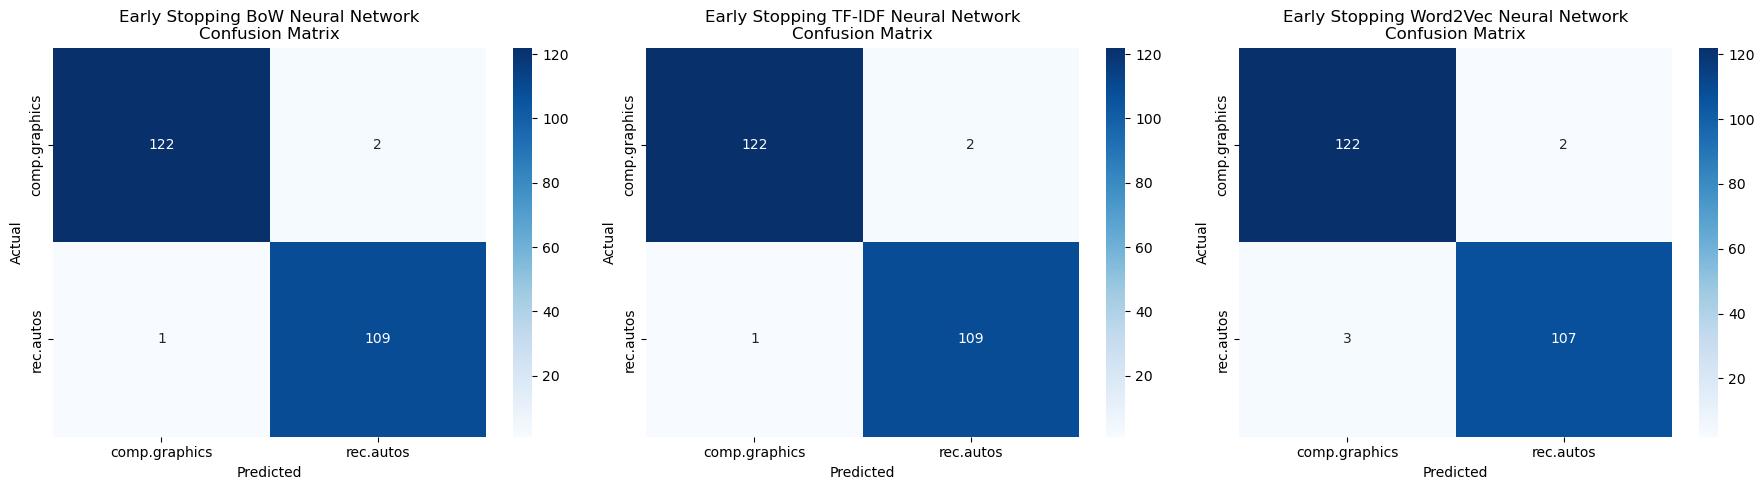

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

class_names = ['comp.graphics', 'rec.autos']

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

cm_bow = confusion_matrix(y_test, y_pred_labels)
sns.heatmap(cm_bow, annot=True, fmt='d', cmap='Blues', 
           xticklabels=class_names, yticklabels=class_names, ax=axes[0])
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')
axes[0].set_title('Early Stopping BoW Neural Network\nConfusion Matrix')

cm_tfidf = confusion_matrix(y_test, y_pred_tfidf_labels)
sns.heatmap(cm_tfidf, annot=True, fmt='d', cmap='Blues', 
           xticklabels=class_names, yticklabels=class_names, ax=axes[1])
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('Actual')
axes[1].set_title('Early Stopping TF-IDF Neural Network\nConfusion Matrix')

cm_w2v = confusion_matrix(y_test, y_pred_w2v_labels)
sns.heatmap(cm_w2v, annot=True, fmt='d', cmap='Blues', 
           xticklabels=class_names, yticklabels=class_names, ax=axes[2])
axes[2].set_xlabel('Predicted')
axes[2].set_ylabel('Actual')
axes[2].set_title('Early Stopping Word2Vec Neural Network\nConfusion Matrix')

plt.tight_layout()
plt.show()

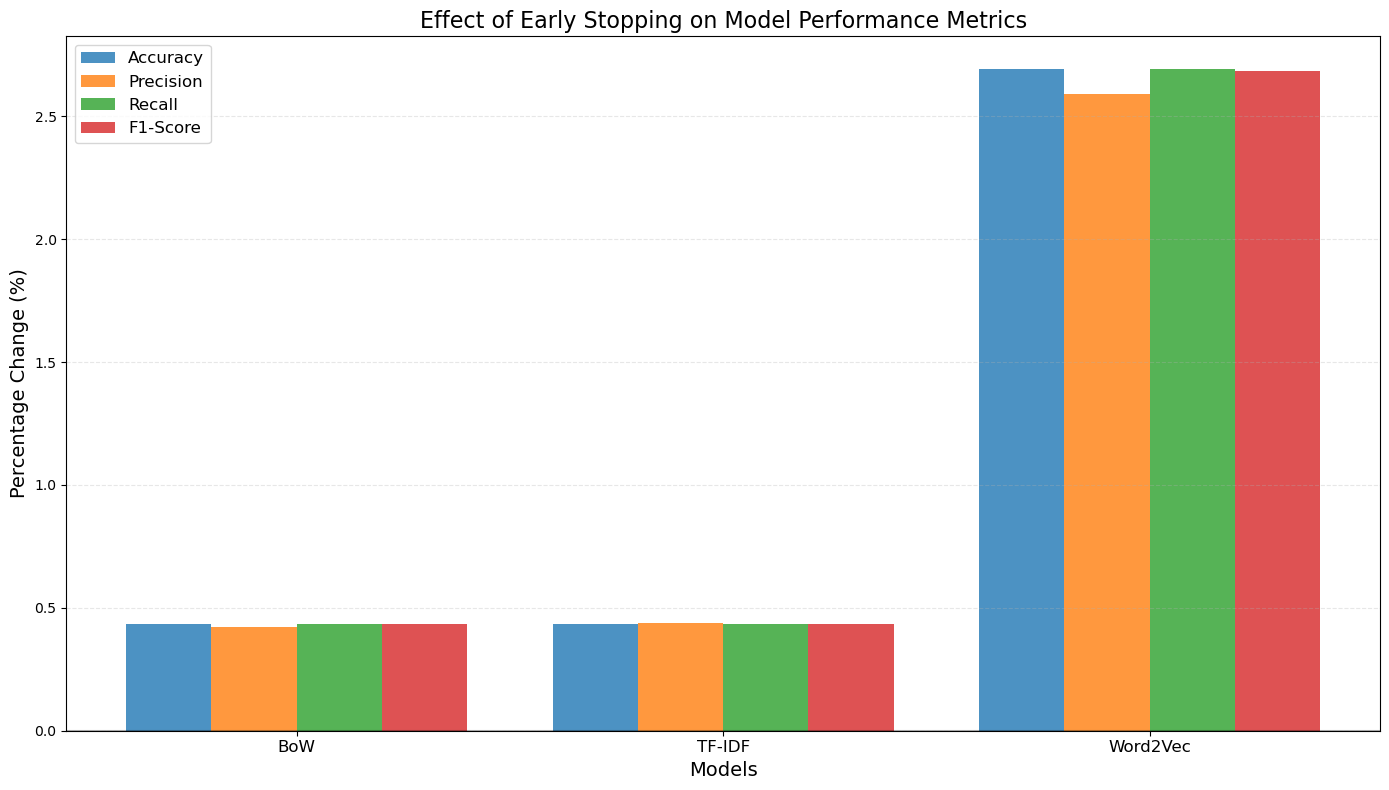

In [23]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

percentage_changes = {
    'BoW': {
        'Accuracy': ((es_accuracy - accuracy) / accuracy * 100),
        'Precision': ((es_precision - precision) / precision * 100),
        'Recall': ((es_recall - recall) / recall * 100),
        'F1-Score': ((es_f1 - f1) / f1 * 100)
    },
    'TF-IDF': {
        'Accuracy': ((es_accuracy_tfidf - accuracy_tfidf) / accuracy_tfidf * 100),
        'Precision': ((es_precision_tfidf - precision_tfidf) / precision_tfidf * 100),
        'Recall': ((es_recall_tfidf - recall_tfidf) / recall_tfidf * 100),
        'F1-Score': ((es_f1_tfidf - f1_tfidf) / f1_tfidf * 100)
    },
    'Word2Vec': {
        'Accuracy': ((es_accuracy_w2v - accuracy_w2v) / accuracy_w2v * 100),
        'Precision': ((es_precision_w2v - precision_w2v) / precision_w2v * 100),
        'Recall': ((es_recall_w2v - recall_w2v) / recall_w2v * 100),
        'F1-Score': ((es_f1_w2v - f1_w2v) / f1_w2v * 100)
    }
}

df = pd.DataFrame(percentage_changes)

plt.figure(figsize=(14, 8))

bar_width = 0.2
models = list(percentage_changes.keys())
metrics = list(percentage_changes['BoW'].keys())
x = np.arange(len(models))

for i, metric in enumerate(metrics):
    values = [percentage_changes[model][metric] for model in models]
    plt.bar(x + i * bar_width, values, width=bar_width, 
            label=metric, alpha=0.8)

plt.xlabel('Models', fontsize=14)
plt.ylabel('Percentage Change (%)', fontsize=14)
plt.title('Effect of Early Stopping on Model Performance Metrics', fontsize=16)
plt.xticks(x + bar_width * 1.5, models, fontsize=12)
plt.axhline(y=0, color='black', linestyle='-', alpha=0.3)  # Zero line
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.legend(fontsize=12)

plt.tight_layout()
plt.show()

## Batch normalization
In this step, the effects of batch normalization towards performance is explored. Other variables are left the same as the base experiment

In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import accuracy_score
import numpy as np
import tensorflow as tf

np.random.seed(42)
tf.random.set_seed(42)

X_train_vec_dense = X_train_vec.toarray()
X_test_vec_dense = X_test_vec.toarray()
X_train_tfidf_dense = X_train_tfidf.toarray()
X_test_tfidf_dense = X_test_tfidf.toarray()

y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

print("Training Neural Network with BoW features and batch normalization...")
model = Sequential([
    Dense(32, activation='relu', input_shape=(X_train_vec_dense.shape[1],), 
          kernel_initializer=tf.keras.initializers.GlorotUniform(seed=42)),
    BatchNormalization(),  # Add batch normalization layer
    Dense(4, activation='relu', 
          kernel_initializer=tf.keras.initializers.GlorotUniform(seed=42)),
    BatchNormalization(),  # Add batch normalization layer
    Dense(2, activation='softmax', 
          kernel_initializer=tf.keras.initializers.GlorotUniform(seed=42))
])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train_vec_dense, y_train_cat, epochs=5, batch_size=32, verbose=0)

print("Training Neural Network with TF-IDF features and batch normalization...")
tfidf_model = Sequential([
    Dense(32, activation='relu', input_shape=(X_train_tfidf_dense.shape[1],), 
          kernel_initializer=tf.keras.initializers.GlorotUniform(seed=42)),
    # Notice no normalization after input layer. since tf-idf is already normalized, prevent double normalization 
    Dense(4, activation='relu', 
          kernel_initializer=tf.keras.initializers.GlorotUniform(seed=42)),
    BatchNormalization(),  # Add batch normalization layer
    Dense(2, activation='softmax', 
          kernel_initializer=tf.keras.initializers.GlorotUniform(seed=42))
])
tfidf_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
tfidf_model.fit(X_train_tfidf_dense, y_train_cat, epochs=5, batch_size=32, verbose=0)

print("Training Neural Network with Word2Vec features and batch normalization...")
w2v_model_lr = Sequential([
    Dense(32, activation='relu', input_shape=(X_train_w2v.shape[1],), 
          kernel_initializer=tf.keras.initializers.GlorotUniform(seed=42)),
    BatchNormalization(),  # Add batch normalization layer
    Dense(4, activation='relu', 
          kernel_initializer=tf.keras.initializers.GlorotUniform(seed=42)),
    BatchNormalization(),  # Add batch normalization layer
    Dense(2, activation='softmax', 
          kernel_initializer=tf.keras.initializers.GlorotUniform(seed=42))
])
w2v_model_lr.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
w2v_model_lr.fit(X_train_w2v, y_train_cat, epochs=5, batch_size=32, verbose=0)

print("Testing ann models with batch normalization...")

y_pred_proba = model.predict(X_test_vec_dense)
y_pred_labels = np.argmax(y_pred_proba, axis=1)
bn_accuracy = accuracy_score(y_test, y_pred_labels)
bn_precision = precision_score(y_test, y_pred_labels, average='weighted')
bn_recall = recall_score(y_test, y_pred_labels, average='weighted')
bn_f1 = f1_score(y_test, y_pred_labels, average='weighted')

y_pred_tfidf_proba = tfidf_model.predict(X_test_tfidf_dense)
y_pred_tfidf_labels = np.argmax(y_pred_tfidf_proba, axis=1)
bn_accuracy_tfidf = accuracy_score(y_test, y_pred_tfidf_labels)
bn_precision_tfidf = precision_score(y_test, y_pred_tfidf_labels, average='weighted')
bn_recall_tfidf = recall_score(y_test, y_pred_tfidf_labels, average='weighted')
bn_f1_tfidf = f1_score(y_test, y_pred_tfidf_labels, average='weighted')

y_pred_w2v_proba = w2v_model_lr.predict(X_test_w2v)
y_pred_w2v_labels = np.argmax(y_pred_w2v_proba, axis=1)
bn_accuracy_w2v = accuracy_score(y_test, y_pred_w2v_labels)
bn_precision_w2v = precision_score(y_test, y_pred_w2v_labels, average='weighted')
bn_recall_w2v = recall_score(y_test, y_pred_w2v_labels, average='weighted')
bn_f1_w2v = f1_score(y_test, y_pred_w2v_labels, average='weighted')

print("\nModel Comparison (with Batch Normalization):")
print("CountVectorizer + Neural Network:")
print(f"  Accuracy:  {bn_accuracy:.4f}")
print(f"  Precision: {bn_precision:.4f}")
print(f"  Recall:    {bn_recall:.4f}")
print(f"  F1-Score:  {bn_f1:.4f}")
print("\nTF-IDF + Neural Network:")
print(f"  Accuracy:  {bn_accuracy_tfidf:.4f}")
print(f"  Precision: {bn_precision_tfidf:.4f}")
print(f"  Recall:    {bn_recall_tfidf:.4f}")
print(f"  F1-Score:  {bn_f1_tfidf:.4f}")
print("\nWord2Vec + Neural Network:")
print(f"  Accuracy:  {bn_accuracy_w2v:.4f}")
print(f"  Precision: {bn_precision_w2v:.4f}")
print(f"  Recall:    {bn_recall_w2v:.4f}")
print(f"  F1-Score:  {bn_f1_w2v:.4f}")

print("\nPercentage Changes from Base Experiment:")
print("CountVectorizer + Neural Network:")
print(f"  Accuracy:  {((bn_accuracy - accuracy) / accuracy * 100):.2f}%")
print(f"  Precision: {((bn_precision - precision) / precision * 100):.2f}%")
print(f"  Recall:    {((bn_recall - recall) / recall * 100):.2f}%")
print(f"  F1-Score:  {((bn_f1 - f1) / f1 * 100):.2f}%")
print("\nTF-IDF + Neural Network:")
print(f"  Accuracy:  {((bn_accuracy_tfidf - accuracy_tfidf) / accuracy_tfidf * 100):.2f}%")
print(f"  Precision: {((bn_precision_tfidf - precision_tfidf) / precision_tfidf * 100):.2f}%")
print(f"  Recall:    {((bn_recall_tfidf - recall_tfidf) / recall_tfidf * 100):.2f}%")
print(f"  F1-Score:  {((bn_f1_tfidf - f1_tfidf) / f1_tfidf * 100):.2f}%")
print("\nWord2Vec + Neural Network:")
print(f"  Accuracy:  {((bn_accuracy_w2v - accuracy_w2v) / accuracy_w2v * 100):.2f}%")
print(f"  Precision: {((bn_precision_w2v - precision_w2v) / precision_w2v * 100):.2f}%")
print(f"  Recall:    {((bn_recall_w2v - recall_w2v) / recall_w2v * 100):.2f}%")
print(f"  F1-Score:  {((bn_f1_w2v - f1_w2v) / f1_w2v * 100):.2f}%")

Training Neural Network with BoW features and batch normalization...
Training Neural Network with TF-IDF features and batch normalization...
Training Neural Network with Word2Vec features and batch normalization...
Testing ann models with batch normalization...
8/8 [==============================] - 0s 457us/step

Model Comparison (with Batch Normalization):
CountVectorizer + Neural Network:
  Accuracy:  0.9658
  Precision: 0.9671
  Recall:    0.9658
  F1-Score:  0.9658

TF-IDF + Neural Network:
  Accuracy:  0.9829
  Precision: 0.9830
  Recall:    0.9829
  F1-Score:  0.9829

Word2Vec + Neural Network:
  Accuracy:  0.9530
  Precision: 0.9539
  Recall:    0.9530
  F1-Score:  0.9530

Percentage Changes from Base Experiment:
CountVectorizer + Neural Network:
  Accuracy:  -1.74%
  Precision: -1.62%
  Recall:    -1.74%
  F1-Score:  -1.74%

TF-IDF + Neural Network:
  Accuracy:  0.00%
  Precision: 0.01%
  Recall:    0.00%
  F1-Score:  -0.00%

Word2Vec + Neural Network:
  Accuracy:  0.00%
  Pre

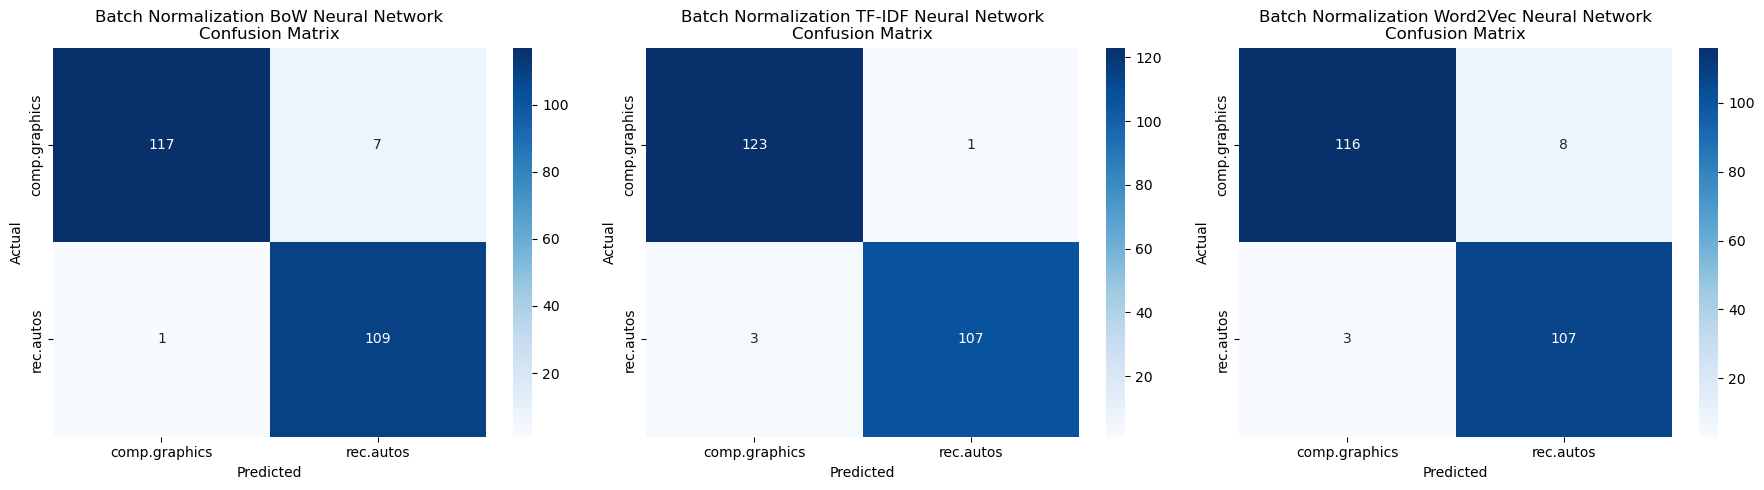

In [25]:

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

class_names = ['comp.graphics', 'rec.autos']

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

cm_bow = confusion_matrix(y_test, y_pred_labels)
sns.heatmap(cm_bow, annot=True, fmt='d', cmap='Blues', 
           xticklabels=class_names, yticklabels=class_names, ax=axes[0])
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')
axes[0].set_title('Batch Normalization BoW Neural Network\nConfusion Matrix')


cm_tfidf = confusion_matrix(y_test, y_pred_tfidf_labels)
sns.heatmap(cm_tfidf, annot=True, fmt='d', cmap='Blues', 
           xticklabels=class_names, yticklabels=class_names, ax=axes[1])
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('Actual')
axes[1].set_title('Batch Normalization TF-IDF Neural Network\nConfusion Matrix')


cm_w2v = confusion_matrix(y_test, y_pred_w2v_labels)
sns.heatmap(cm_w2v, annot=True, fmt='d', cmap='Blues', 
           xticklabels=class_names, yticklabels=class_names, ax=axes[2])
axes[2].set_xlabel('Predicted')
axes[2].set_ylabel('Actual')
axes[2].set_title('Batch Normalization Word2Vec Neural Network\nConfusion Matrix')

plt.tight_layout()
plt.show()

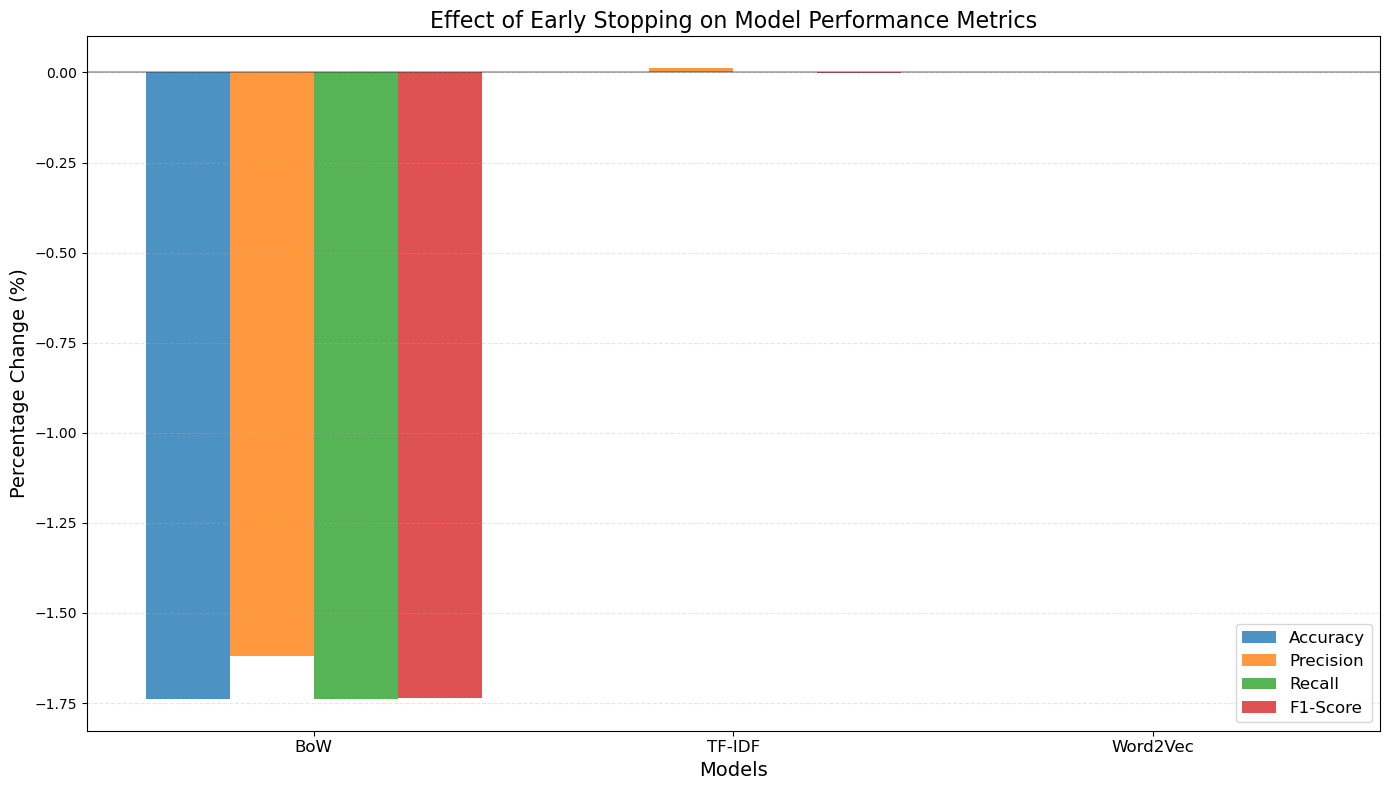

In [26]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

percentage_changes = {
    'BoW': {
        'Accuracy': ((bn_accuracy - accuracy) / accuracy * 100),
        'Precision': ((bn_precision - precision) / precision * 100),
        'Recall': ((bn_recall - recall) / recall * 100),
        'F1-Score': ((bn_f1 - f1) / f1 * 100)
    },
    'TF-IDF': {
        'Accuracy': ((bn_accuracy_tfidf - accuracy_tfidf) / accuracy_tfidf * 100),
        'Precision': ((bn_precision_tfidf - precision_tfidf) / precision_tfidf * 100),
        'Recall': ((bn_recall_tfidf - recall_tfidf) / recall_tfidf * 100),
        'F1-Score': ((bn_f1_tfidf - f1_tfidf) / f1_tfidf * 100)
    },
    'Word2Vec': {
        'Accuracy': ((bn_accuracy_w2v - accuracy_w2v) / accuracy_w2v * 100),
        'Precision': ((bn_precision_w2v - precision_w2v) / precision_w2v * 100),
        'Recall': ((bn_recall_w2v - recall_w2v) / recall_w2v * 100),
        'F1-Score': ((bn_f1_w2v - f1_w2v) / f1_w2v * 100)
    }
}

df = pd.DataFrame(percentage_changes)

plt.figure(figsize=(14, 8))

bar_width = 0.2
models = list(percentage_changes.keys())
metrics = list(percentage_changes['BoW'].keys())
x = np.arange(len(models))

for i, metric in enumerate(metrics):
    values = [percentage_changes[model][metric] for model in models]
    plt.bar(x + i * bar_width, values, width=bar_width, 
            label=metric, alpha=0.8)

plt.xlabel('Models', fontsize=14)
plt.ylabel('Percentage Change (%)', fontsize=14)
plt.title('Effect of Early Stopping on Model Performance Metrics', fontsize=16)
plt.xticks(x + bar_width * 1.5, models, fontsize=12)
plt.axhline(y=0, color='black', linestyle='-', alpha=0.3)  # Zero line
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.legend(fontsize=12)

plt.tight_layout()
plt.show()